In [ ]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 15.5 MB/s 
     |████████████████████████████████| 6.8 MB 69.2 MB/s 
     |████████████████████████████████| 895 kB 59.7 MB/s 
     |████████████████████████████████| 596 kB 53.2 MB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline


In [ ]:
import numpy as np


In [ ]:

from transformers import (
   AutoConfig,
   AutoTokenizer,
   TFAutoModelForSequenceClassification,
   AdamW,
   glue_convert_examples_to_features
)
import tensorflow as tf
import tensorflow_datasets as tfds
import json

import transformers
from transformers import AutomaticSpeechRecognitionPipeline
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
# RANDOM_SEED = 42
# np.random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
from transformers import BertTokenizer


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
tokenizer.truncation = True

In [ ]:
# pipeline("<task-name>")

# # Using a user-specified model
# pipeline("<task-name>", model="<model_name>")

# Using custom model/tokenizer as str
nlp_features = pipeline('feature-extraction', model='bert-base-uncased', tokenizer= tokenizer,max_length = 96,truncation = True,device=0)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/MVSA/MVSA-Single.zip

Streaming output truncated to the last 5000 lines.
 extracting: MVSA_Single/data/3347.txt  
  inflating: MVSA_Single/data/3348.jpg  
  inflating: MVSA_Single/data/3348.txt  
  inflating: MVSA_Single/data/3349.jpg  
 extracting: MVSA_Single/data/3349.txt  
  inflating: MVSA_Single/data/335.jpg  
  inflating: MVSA_Single/data/335.txt  
  inflating: MVSA_Single/data/3350.jpg  
 extracting: MVSA_Single/data/3350.txt  
  inflating: MVSA_Single/data/3351.jpg  
  inflating: MVSA_Single/data/3351.txt  
  inflating: MVSA_Single/data/3352.jpg  
  inflating: MVSA_Single/data/3352.txt  
  inflating: MVSA_Single/data/3353.jpg  
 extracting: MVSA_Single/data/3353.txt  
  inflating: MVSA_Single/data/3354.jpg  
  inflating: MVSA_Single/data/3354.txt  
  inflating: MVSA_Single/data/3355.jpg  
 extracting: MVSA_Single/data/3355.txt  
  inflating: MVSA_Single/data/3356.jpg  
  inflating: MVSA_Single/data/3356.txt  
  inflating: MVSA_Single/data/3357.jpg  
  inflating: MVSA_Single/data/3357.txt  
  inflat

In [ ]:
import os

In [ ]:
img_names = []
text_transcriptions = []
for files in sorted(os.listdir("/content/MVSA_Single/data")):
  if files.endswith(".jpg"):
    img_names.append(files)
  else:
    file1 = open(os.path.join("/content/MVSA_Single/data",files),"rb")
    text_transcriptions.append(file1.readline())

In [ ]:
import pandas as pd


In [ ]:
df_ = pd.DataFrame(zip(img_names,text_transcriptions),columns = ['img_names','text_transcriptions'])

In [ ]:
df = pd.read_csv("/content/MVSA_Single/labelResultAll.txt")

In [ ]:
df.head()

,ID\ttext,image
0,1\tneutral,positive
1,2\tneutral,positive
2,3\tneutral,positive
3,4\tpositive,positive
4,5\tpositive,positive


In [ ]:
df['ID'] = df['ID\ttext'].apply(lambda x :x.split('\t')[0])
df['text'] = df['ID\ttext'].apply(lambda x :x.split('\t')[1])
df.drop(columns = ['ID\ttext'],inplace = True)

In [ ]:
df.head()

,image,ID,text
0,positive,1,neutral
1,positive,2,neutral
2,positive,3,neutral
3,positive,4,positive
4,positive,5,positive


In [ ]:
df['ID'] = df['ID'] + ".jpg"

In [ ]:
df.head()

,image,ID,text
0,positive,1.jpg,neutral
1,positive,2.jpg,neutral
2,positive,3.jpg,neutral
3,positive,4.jpg,positive
4,positive,5.jpg,positive


In [ ]:
df.columns = ['image_label','img_names','text_labels']

In [ ]:
df_.head()

,img_names,text_transcriptions
0,1.jpg,b'How I feel today #legday #jelly #aching #gym...
1,10.jpg,b'@ArrivaTW absolute disgrace two carriages fr...
2,100.jpg,"b""This is my Valentine's from 1 of my nephews...."
3,1000.jpg,"b""betterfeelingfilms: RT via Instagram: First ..."
4,1001.jpg,"b""Zoe's first love #Rattled @JohnnyHarper15 \r\n"""


In [ ]:
df_final = pd.merge(df, df_, on="img_names")


In [ ]:
df_final.head()

,image_label,img_names,text_labels,text_transcriptions
0,positive,1.jpg,neutral,b'How I feel today #legday #jelly #aching #gym...
1,positive,2.jpg,neutral,b'grattis min griskulting!!!???? va bara tvung...
2,positive,3.jpg,neutral,b'RT @polynminion: The moment I found my favou...
3,positive,4.jpg,positive,b'#escort We have a young and energetic team a...
4,positive,5.jpg,positive,b'RT @chrisashaffer: Went to SSC today to be a...


In [ ]:
df = df_final

In [ ]:
import os

In [ ]:
df = df.drop(columns = ['image_label'])

In [ ]:
df.head()

,img_names,text_labels,text_transcriptions
0,1.jpg,neutral,b'How I feel today #legday #jelly #aching #gym...
1,2.jpg,neutral,b'grattis min griskulting!!!???? va bara tvung...
2,3.jpg,neutral,b'RT @polynminion: The moment I found my favou...
3,4.jpg,positive,b'#escort We have a young and energetic team a...
4,5.jpg,positive,b'RT @chrisashaffer: Went to SSC today to be a...


In [ ]:
df.columns = ['file_name','label','Text Transcription']

In [ ]:
# df = df_final

In [ ]:
df_train, df_val = train_test_split(
  df,
  test_size=0.20,
  stratify = df.label.values,
  random_state=42
)
df_val, df_test = train_test_split(
  df_val,
  test_size=0.50,
  stratify = df_val.label.values,
  random_state=42
)


df_train.shape, df_val.shape

((3895, 3), (487, 3))

In [ ]:
df_train.head(1)

,file_name,label,Text Transcription
1490,1491.jpg,positive,b'Eeek love that our kitchen is finally finish...


In [ ]:
df_train['Text Transcription'] = df_train['Text Transcription'].apply(lambda x: str(x))

In [ ]:
# df_train['len'] = df_train['Text Transcription'].apply(lambda x: len(x.split()))

In [ ]:
df_train.head()

,file_name,label,Text Transcription
1490,1491.jpg,positive,b'Eeek love that our kitchen is finally finish...
1302,1303.jpg,positive,b'# 1 fan goes out to Daddy ???? #crippled \r\n'
3375,3621.jpg,positive,b'Come get you good Quality Brazilian hair ?? ...
79,80.jpg,negative,"b""Grab your brain mittens twitter I'm super ec..."
1107,1108.jpg,positive,b'RT @Travel1Jo: Good morning from the #vibran...


In [ ]:
# max()

In [ ]:
# df_train['Text Transcription'].values[69]

In [ ]:
# def cutter(s):
#   if len(s.split()) > 250:
#     ans = " ".join(s.split()[:250])
#   else:
#     ans = s
#   return ans

In [ ]:
# df_train['Text Transcription'] = df_train['Text Transcription'].apply(lambda x: cutter(x))

In [ ]:
train_features = nlp_features(list(df_train['Text Transcription'].values))

In [ ]:
train_features_final = []
for feat in train_features:
  train_features_final.append(np.array(feat).mean(axis = 1))

In [ ]:
len(train_features_final)

3895

In [ ]:
del train_features

In [ ]:
df_train ['features'] = train_features_final

In [ ]:
df_train.head()

,file_name,label,Text Transcription,features
1490,1491.jpg,positive,b'Eeek love that our kitchen is finally finish...,"[[0.48229258889822585, 0.37820311890620933, 0...."
1302,1303.jpg,positive,b'# 1 fan goes out to Daddy ???? #crippled \r\n',"[[0.15927239473570476, 0.012888330278325488, 0..."
3375,3621.jpg,positive,b'Come get you good Quality Brazilian hair ?? ...,"[[0.4019674079359642, -0.059466086461075714, 0..."
79,80.jpg,negative,"b""Grab your brain mittens twitter I'm super ec...","[[0.5820634159548529, 0.06779405628812724, 0.5..."
1107,1108.jpg,positive,b'RT @Travel1Jo: Good morning from the #vibran...,"[[0.28314360587255044, 0.17438884698511922, 0...."


In [ ]:
del train_features_final

In [ ]:
val_features = nlp_features(list(df_val['Text Transcription'].values))

In [ ]:
val_features_final = []
for feat in val_features:
  val_features_final.append(np.array(feat).mean(axis = 1))

In [ ]:
df_val ['features'] = val_features_final

In [ ]:
df_test.head()

,file_name,label,Text Transcription
1024,1025.jpg,neutral,b'RT @AstroTerry: #speechless from this #sunri...
1575,1576.jpg,negative,b'Let your voice be heard! 18+ #endsuicide #bl...
3168,3409.jpg,neutral,"b'The Nervous System, Part 1: Crash Course A&P..."
1669,1670.jpg,negative,b'@GeorgesNiang20 I think you heard me yelling...
3772,4033.jpg,positive,"b""Wednesday's laugh brought you by the Daily M..."


In [ ]:
df_test['Text Transcription'] = df_test['Text Transcription'].apply(lambda x: str(x))

In [ ]:
test_features = nlp_features(list(df_test['Text Transcription'].values))

In [ ]:
test_features_final = []
for feat in test_features:
  test_features_final.append(np.array(feat).mean(axis = 1))

In [ ]:
df_test ['features'] = test_features_final

Image Features

In [ ]:

   
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

# Load the pretrained model
model = models.resnet18(pretrained=True)

# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

# Set model to evaluation mode
model.eval()

# Image transforms
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name).convert('RGB')
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(1, 512, 1, 512)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data)
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding.numpy()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [ ]:
import os

In [ ]:
img_features = []
for imgs in df_train.file_name.values:
  img_features.append(get_vector(os.path.join("/content/MVSA_Single/data",imgs)))

In [ ]:
final_img_features = []
for img_feat in img_features:
  final_img_features.append(img_feat.mean(axis=0).mean(axis=1).mean(axis = 0))

In [ ]:
df_train['image_features'] = final_img_features

In [ ]:
df_train.head()

,file_name,label,Text Transcription,features,image_features
1490,1491.jpg,positive,b'Eeek love that our kitchen is finally finish...,"[[0.48229258889822585, 0.37820311890620933, 0....","[0.7023538, 0.7023538, 0.7023538, 0.7023538, 0..."
1302,1303.jpg,positive,b'# 1 fan goes out to Daddy ???? #crippled \r\n',"[[0.15927239473570476, 0.012888330278325488, 0...","[0.8588338, 0.8588338, 0.8588338, 0.8588338, 0..."
3375,3621.jpg,positive,b'Come get you good Quality Brazilian hair ?? ...,"[[0.4019674079359642, -0.059466086461075714, 0...","[0.8431116, 0.8431116, 0.8431116, 0.8431116, 0..."
79,80.jpg,negative,"b""Grab your brain mittens twitter I'm super ec...","[[0.5820634159548529, 0.06779405628812724, 0.5...","[0.9595906, 0.9595906, 0.9595906, 0.9595906, 0..."
1107,1108.jpg,positive,b'RT @Travel1Jo: Good morning from the #vibran...,"[[0.28314360587255044, 0.17438884698511922, 0....","[0.94381887, 0.94381887, 0.94381887, 0.9438188..."


In [ ]:
img_features = []
for imgs in df_val.file_name.values:
  img_features.append(get_vector(os.path.join("/content/train_images",imgs)))

In [ ]:
final_img_features = []
for img_feat in img_features:
  final_img_features.append(img_feat.mean(axis=0).mean(axis=1).mean(axis = 0))

In [ ]:
df_val['image_features'] = final_img_features

In [ ]:
img_features = []
for imgs in df_test.file_name.values:
  img_features.append(get_vector(os.path.join("/content/MVSA_Single/data",imgs)))

In [ ]:
final_img_features = []
for img_feat in img_features:
  final_img_features.append(img_feat.mean(axis=0).mean(axis=1).mean(axis = 0))

In [ ]:
df_test['image_features'] = final_img_features

In [ ]:
df_train['features'] = df_train['features'].apply(lambda x : x.mean(axis = 0))

In [ ]:
df_train.head()

,file_name,label,Text Transcription,features,image_features
1490,1491.jpg,positive,b'Eeek love that our kitchen is finally finish...,"[0.48229258889822585, 0.37820311890620933, 0.6...","[0.7023538, 0.7023538, 0.7023538, 0.7023538, 0..."
1302,1303.jpg,positive,b'# 1 fan goes out to Daddy ???? #crippled \r\n',"[0.15927239473570476, 0.012888330278325488, 0....","[0.8588338, 0.8588338, 0.8588338, 0.8588338, 0..."
3375,3621.jpg,positive,b'Come get you good Quality Brazilian hair ?? ...,"[0.4019674079359642, -0.059466086461075714, 0....","[0.8431116, 0.8431116, 0.8431116, 0.8431116, 0..."
79,80.jpg,negative,"b""Grab your brain mittens twitter I'm super ec...","[0.5820634159548529, 0.06779405628812724, 0.55...","[0.9595906, 0.9595906, 0.9595906, 0.9595906, 0..."
1107,1108.jpg,positive,b'RT @Travel1Jo: Good morning from the #vibran...,"[0.28314360587255044, 0.17438884698511922, 0.8...","[0.94381887, 0.94381887, 0.94381887, 0.9438188..."


In [ ]:
df_test.head()

,file_name,label,Text Transcription,features,image_features
1024,1025.jpg,neutral,b'RT @AstroTerry: #speechless from this #sunri...,"[[0.42167254918742747, 0.305423111078285, 0.70...","[0.6566475, 0.6566475, 0.6566475, 0.6566475, 0..."
1575,1576.jpg,negative,b'Let your voice be heard! 18+ #endsuicide #bl...,"[[0.18679007701575756, 0.1675897558674305, 0.5...","[0.87706804, 0.87706804, 0.87706804, 0.8770680..."
3168,3409.jpg,neutral,"b'The Nervous System, Part 1: Crash Course A&P...","[[0.1364280009834931, 0.20506492102968282, 0.4...","[0.697865, 0.697865, 0.697865, 0.697865, 0.697..."
1669,1670.jpg,negative,b'@GeorgesNiang20 I think you heard me yelling...,"[[0.37959320644369804, 0.15926013549638762, 0....","[0.961916, 0.961916, 0.961916, 0.961916, 0.961..."
3772,4033.jpg,positive,"b""Wednesday's laugh brought you by the Daily M...","[[0.19343475823588363, -0.10709383955500165, 0...","[0.8939887, 0.8939887, 0.8939887, 0.8939887, 0..."


In [ ]:
df_test['features'] = df_test['features'].apply(lambda x : x.mean(axis = 0))

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df_train['label'] = le.fit_transform(df_train['label'])

In [74]:
df_test['label'] = le.transform(df_test['label'])

In [75]:
training_embeddings_text = df_train.features.values
training_identifiers = df_train.file_name.values
training_labels = df_train.label.values

testing_embeddings_text = df_test.features.values
testing_identifiers = df_test.file_name.values
testing_labels = df_test.label.values

# assert(len(training_identifiers) == len(training_embeddings))
# assert(len(testing_identifiers) == len(testing_embeddings))

In [76]:
testing_embeddings_text.shape

(487,)

In [82]:
training_embeddings_image = df_train.image_features.values
training_identifiers = df_train.file_name.values
training_labels = df_train.label.values

testing_embeddings_image = df_test.image_features.values
testing_identifiers = df_test.file_name.values
testing_labels = df_test.label.values

# assert(len(training_identifiers) == len(training_embeddings))
# assert(len(testing_identifiers) == len(testing_embeddings))

In [83]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(list(training_embeddings_text))  
training_embeddings_bert = scaler.transform(list(training_embeddings_text))  
# applying same transformation to test data
testing_embeddings_bert = scaler.transform(list(testing_embeddings_text)) 

In [84]:
scaler2 = StandardScaler()  
scaler2.fit(list(training_embeddings_image))  
training_embeddings_image = scaler2.transform(list(training_embeddings_image))  
# applying same transformation to test data
testing_embeddings_image = scaler2.transform(list(testing_embeddings_image)) 

In [85]:
training_embeddings = np. concatenate((training_embeddings_bert, training_embeddings_image), axis=1)

In [86]:
from sklearn.neural_network import MLPClassifier


In [87]:
from sklearn.ensemble import BaggingClassifier


In [88]:
clf = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes = 900, solver='adam',early_stopping = True, n_iter_no_change = 10, alpha= 0.010,random_state=10,verbose = True, max_iter=200),
                        n_estimators=10,verbose = 6, random_state=0).fit(list(training_embeddings), training_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 10 for this parallel run (total 10)...
Iteration 1, loss = 1.37248235
Validation score: 0.671795
Iteration 2, loss = 0.61700403
Validation score: 0.792308
Iteration 3, loss = 0.34520917
Validation score: 0.792308
Iteration 4, loss = 0.24327037
Validation score: 0.817949
Iteration 5, loss = 0.18854737
Validation score: 0.856410
Iteration 6, loss = 0.14881197
Validation score: 0.841026
Iteration 7, loss = 0.11833117
Validation score: 0.851282
Iteration 8, loss = 0.09851427
Validation score: 0.830769
Iteration 9, loss = 0.08661803
Validation score: 0.835897
Iteration 10, loss = 0.08029583
Validation score: 0.841026
Iteration 11, loss = 0.08123090
Validation score: 0.848718
Iteration 12, loss = 0.08392747
Validation score: 0.828205
Iteration 13, loss = 0.09155979
Validation score: 0.841026
Iteration 14, loss = 0.08411477
Validation score: 0.853846
Iteration 15, loss = 0.08738901
Validation score: 0.848718
Iteration 16, loss = 0.07868568
Validation score: 0.823077
Va

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min finished


In [89]:
testing_embeddings =  np. concatenate((testing_embeddings_bert, testing_embeddings_image), axis=1)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
predicted_testing_labels = clf.predict(testing_embeddings)
accuracy = accuracy_score(testing_labels, predicted_testing_labels)
print(f"The model has an accuracy of {accuracy:.2}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The model has an accuracy of 0.69


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [92]:
from sklearn.metrics import confusion_matrix, classification_report


In [93]:
print(classification_report(testing_labels, predicted_testing_labels))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       122
           1       0.72      0.72      0.72       192
           2       0.71      0.71      0.71       173

    accuracy                           0.69       487
   macro avg       0.68      0.68      0.68       487
weighted avg       0.69      0.69      0.69       487



              precision    recall  f1-score   support

           0       0.62      0.62      0.62       122
           1       0.72      0.72      0.72       192
           2       0.71      0.71      0.71       173

    accuracy                           0.69       487
   macro avg       0.68      0.68      0.68       487
weighted avg       0.69      0.69      0.69       487



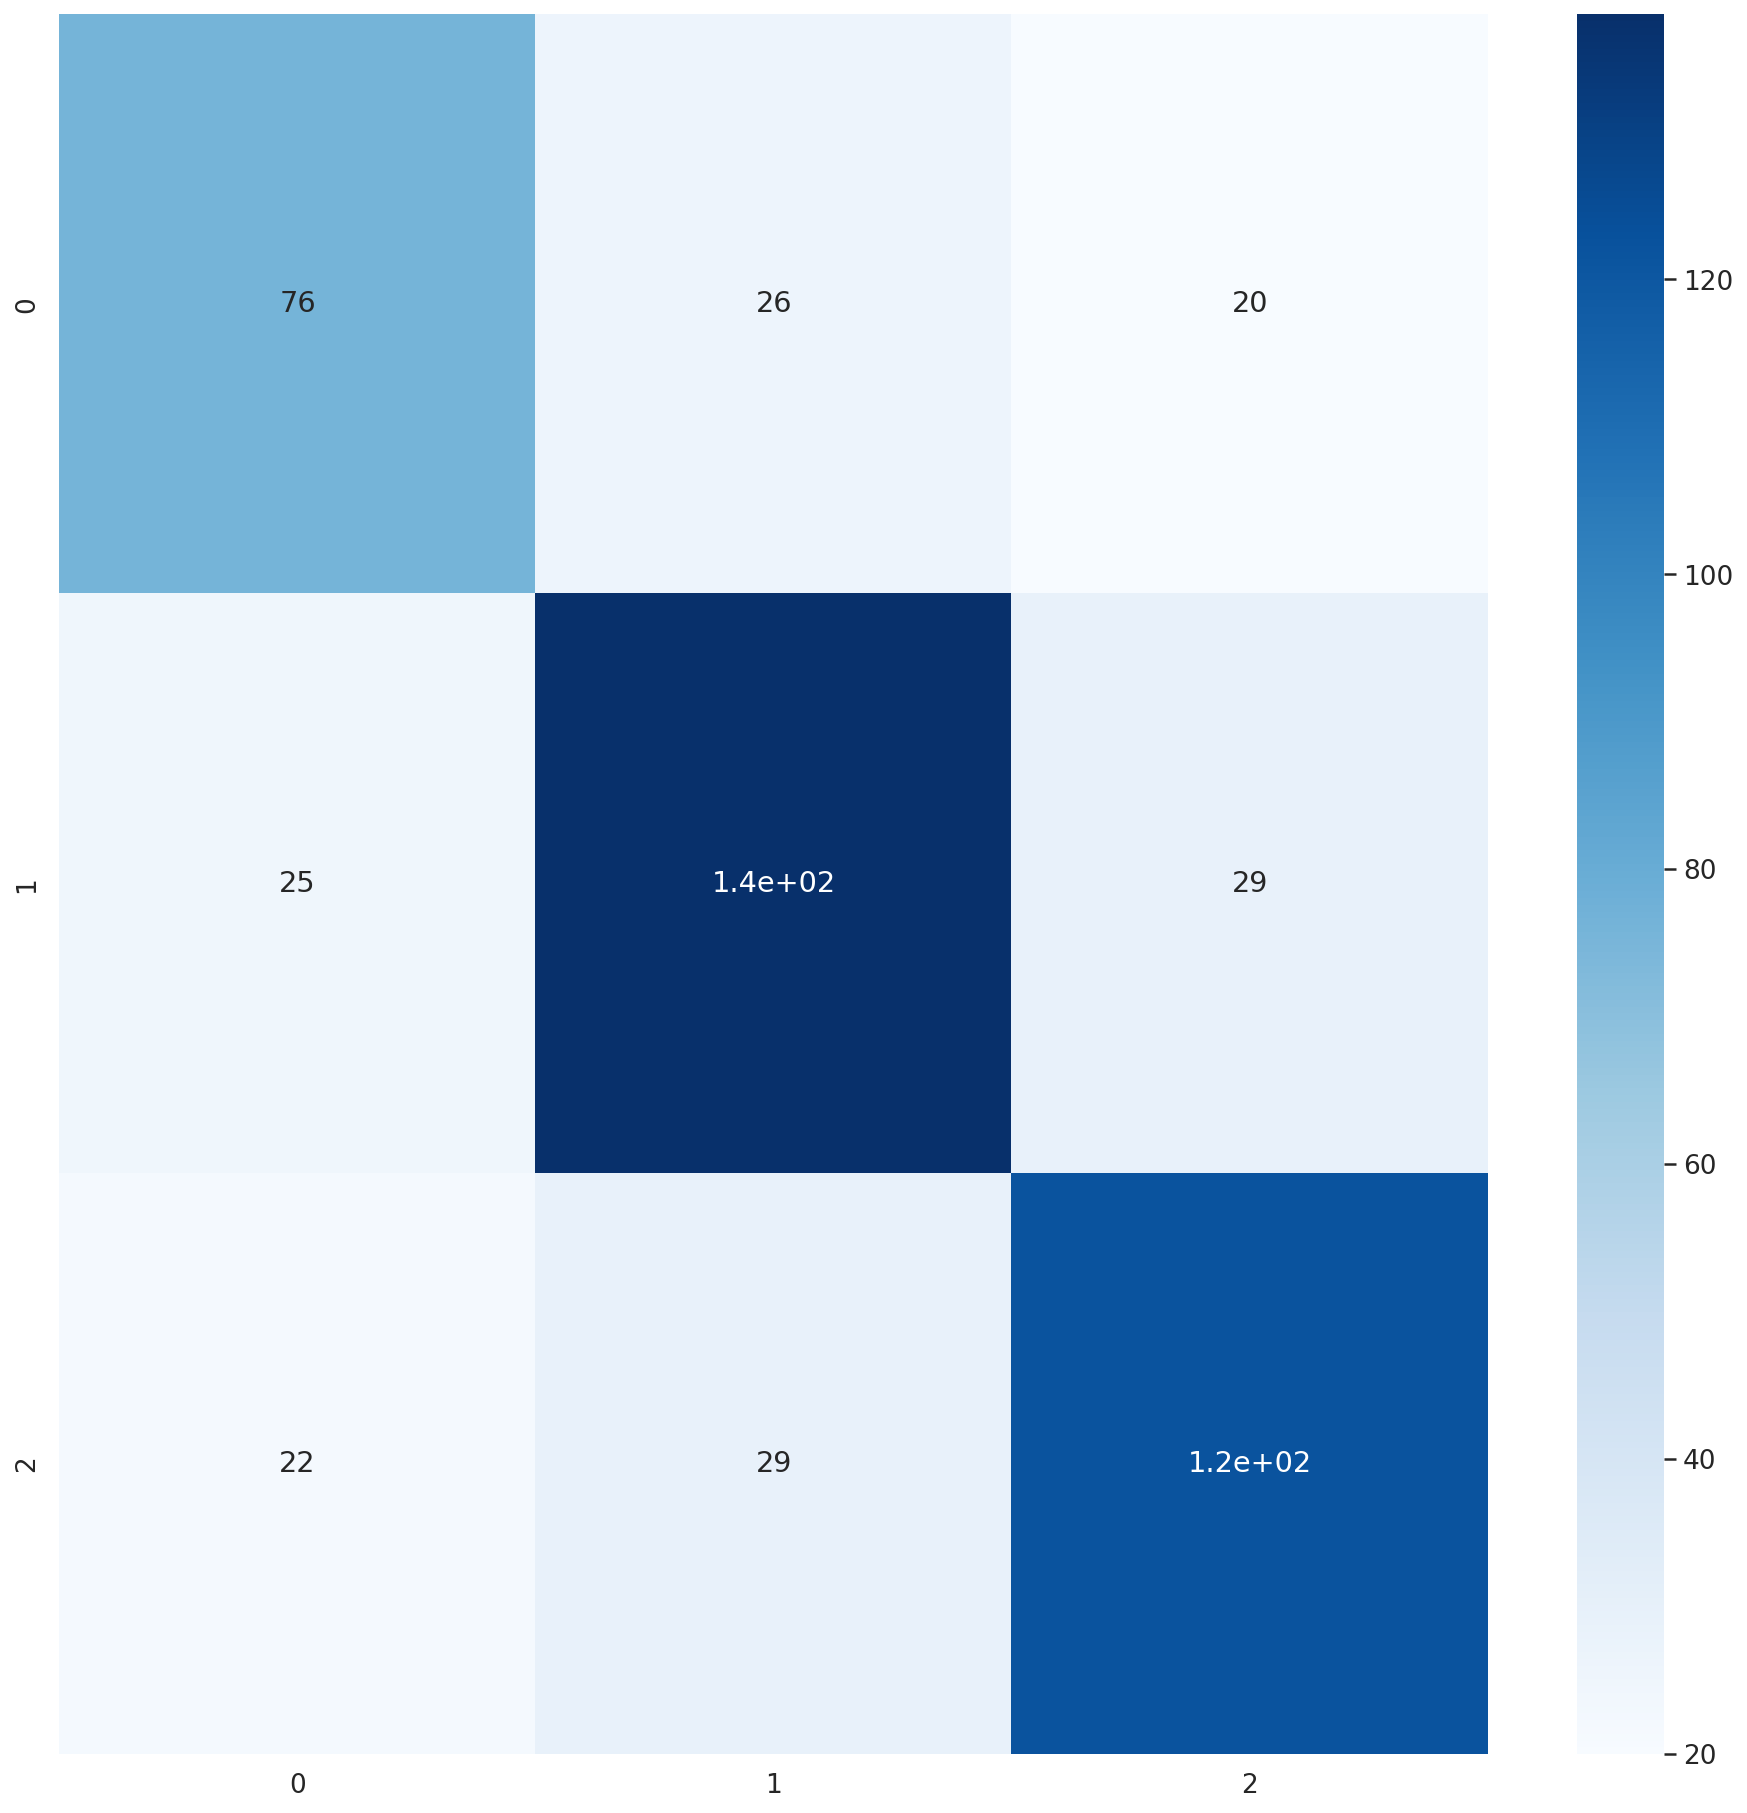

In [94]:
confusionmatrix = confusion_matrix(testing_labels, predicted_testing_labels)
plt.figure(figsize = (16, 16))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)

print(classification_report(testing_labels, predicted_testing_labels))